# Patient Survival Prediction

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import ConfusionMatrixDisplay,classification_report,accuracy_score
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve,roc_auc_score
import pickle
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Project Datasets/dataset.csv')
df

,encounter_id,patient_id,hospital_id,age,bmi,elective_surgery,ethnicity,gender,height,icu_admit_source,...,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem,Unnamed: 83,hospital_death
0,66154,25312,118,68.0,22.730000,0,Caucasian,M,180.3,Floor,...,1.0,0.0,0.0,0.0,0.0,0.0,Sepsis,Cardiovascular,NaN,0
1,114252,59342,81,77.0,27.420000,0,Caucasian,F,160.0,Floor,...,1.0,0.0,0.0,0.0,0.0,0.0,Respiratory,Respiratory,NaN,0
2,119783,50777,118,25.0,31.950000,0,Caucasian,F,172.7,Accident & Emergency,...,0.0,0.0,0.0,0.0,0.0,0.0,Metabolic,Metabolic,NaN,0
3,79267,46918,118,81.0,22.640000,1,Caucasian,F,165.1,Operating Room / Recovery,...,0.0,0.0,0.0,0.0,0.0,0.0,Cardiovascular,Cardiovascular,NaN,0
4,92056,34377,33,19.0,NaN,0,Caucasian,M,188.0,Accident & Emergency,...,0.0,0.0,0.0,0.0,0.0,0.0,Trauma,Trauma,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91708,91592,78108,30,75.0,23.060250,0,Caucasian,M,177.8,Floor,...,1.0,0.0,0.0,0.0,0.0,1.0,Sepsis,Cardiovascular,NaN,0
91709,66119,13486,121,56.0,47.179671,0,Caucasian,F,183.0,Floor,...,0.0,0.0,0.0,0.0,0.0,0.0,Sepsis,Cardiovascular,NaN,0
91710,8981,58179,195,48.0,27.236914,0,Caucasian,M,170.2,Accident & Emergency,...,1.0,0.0,0.0,0.0,0.0,0.0,Metabolic,Metabolic,NaN,0
91711,33776,120598,66,NaN,23.297481,0,Caucasian,F,154.9,Accident & Emergency,...,0.0,0.0,0.0,0.0,0.0,0.0,Respiratory,Respiratory,NaN,0


In [ ]:
df1=df.copy()

In [ ]:
df.shape

(91713, 85)

# Data Preprocessing

1.  Finding out missing values




In [ ]:
# pd.set_option('display.max_columns',None)
df.isna().sum()

encounter_id                       0
patient_id                         0
hospital_id                        0
age                             4228
bmi                             3429
                               ...  
solid_tumor_with_metastasis      715
apache_3j_bodysystem            1662
apache_2_bodysystem             1662
Unnamed: 83                    91713
hospital_death                     0
Length: 85, dtype: int64

Dataframe Info

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91713 entries, 0 to 91712
Data columns (total 85 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   encounter_id                   91713 non-null  int64  
 1   patient_id                     91713 non-null  int64  
 2   hospital_id                    91713 non-null  int64  
 3   age                            87485 non-null  float64
 4   bmi                            88284 non-null  float64
 5   elective_surgery               91713 non-null  int64  
 6   ethnicity                      90318 non-null  object 
 7   gender                         91688 non-null  object 
 8   height                         90379 non-null  float64
 9   icu_admit_source               91601 non-null  object 
 10  icu_id                         91713 non-null  int64  
 11  icu_stay_type                  91713 non-null  object 
 12  icu_type                       91713 non-null 

In [ ]:
df.describe()

,encounter_id,patient_id,hospital_id,age,bmi,elective_surgery,height,icu_id,pre_icu_los_days,weight,...,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,Unnamed: 83,hospital_death
count,91713.000000,91713.000000,91713.000000,87485.000000,88284.000000,91713.000000,90379.000000,91713.000000,91713.000000,88993.000000,...,90998.000000,90998.000000,90998.000000,90998.000000,90998.000000,90998.000000,90998.000000,90998.000000,0.0,91713.000000
mean,65606.079280,65537.131464,105.669262,62.309516,29.185818,0.183736,169.641588,508.357692,0.835766,84.028340,...,0.000857,0.015693,0.225192,0.012989,0.026165,0.007066,0.004132,0.020638,NaN,0.086302
std,37795.088538,37811.252183,62.854406,16.775119,8.275142,0.387271,10.795378,228.989661,2.487756,25.011497,...,0.029265,0.124284,0.417711,0.113229,0.159628,0.083763,0.064148,0.142169,NaN,0.280811
min,1.000000,1.000000,2.000000,16.000000,14.844926,0.000000,137.200000,82.000000,-24.947222,38.600000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.000000
25%,32852.000000,32830.000000,47.000000,52.000000,23.641975,0.000000,162.500000,369.000000,0.035417,66.800000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.000000
50%,65665.000000,65413.000000,109.000000,65.000000,27.654655,0.000000,170.100000,504.000000,0.138889,80.300000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.000000
75%,98342.000000,98298.000000,161.000000,75.000000,32.930206,0.000000,177.800000,679.000000,0.409028,97.100000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.000000
max,131051.000000,131051.000000,204.000000,89.000000,67.814990,1.000000,195.590000,927.000000,159.090972,186.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,NaN,1.000000


Dropping unnecessary columns

In [ ]:
columns_to_drop = ['encounter_id', 'patient_id', 'hospital_id', 'icu_id', 'Unnamed: 83']
df = df.drop(columns=columns_to_drop)

Handling missing values

In [ ]:
for column in df.columns:
  if df[column].dtype == 'float64':
    df[column].fillna(df[column].mean(),inplace=True)
  elif df[column].dtype == 'object':
    df[column].fillna(df[column].mode()[0],inplace=True)

In [ ]:
pd.set_option('display.max_rows',None)
df.isna().sum()

age                              0
bmi                              0
elective_surgery                 0
ethnicity                        0
gender                           0
height                           0
icu_admit_source                 0
icu_stay_type                    0
icu_type                         0
pre_icu_los_days                 0
weight                           0
apache_2_diagnosis               0
apache_3j_diagnosis              0
apache_post_operative            0
arf_apache                       0
gcs_eyes_apache                  0
gcs_motor_apache                 0
gcs_unable_apache                0
gcs_verbal_apache                0
heart_rate_apache                0
intubated_apache                 0
map_apache                       0
resprate_apache                  0
temp_apache                      0
ventilated_apache                0
d1_diasbp_max                    0
d1_diasbp_min                    0
d1_diasbp_noninvasive_max        0
d1_diasbp_noninvasiv

Converting object datatype to numerical values

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for column in df.columns:
  if df[column].dtype == 'object':
    df[column]=le.fit_transform(df[column])

In [ ]:
df['gender'].value_counts()

gender
1    49494
0    42219
Name: count, dtype: int64

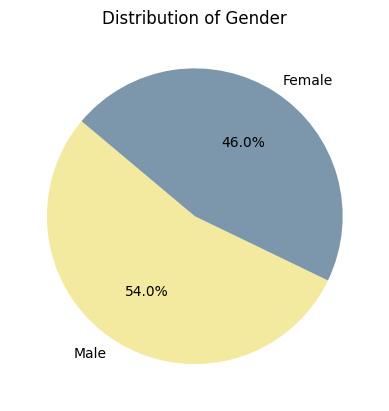

In [ ]:
labels = ['Male', 'Female']
sizes = [49469, 42219]
colors = ["#F3E99F", "#7C96AB"]
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Gender')
plt.show()

Text(0.5, 1.0, 'Hospital Deaths by Ethnicity')

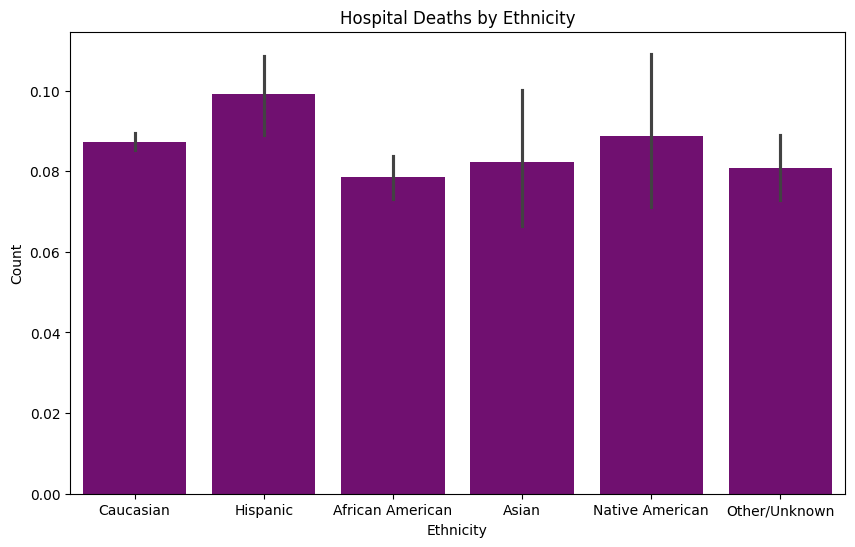

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df1, x='ethnicity', y='hospital_death',color = 'purple')
plt.xlabel('Ethnicity')
plt.ylabel('Count')
plt.title('Hospital Deaths by Ethnicity')

Text(0.5, 1.0, 'Distribution of Heart Rate by Hospital Death')

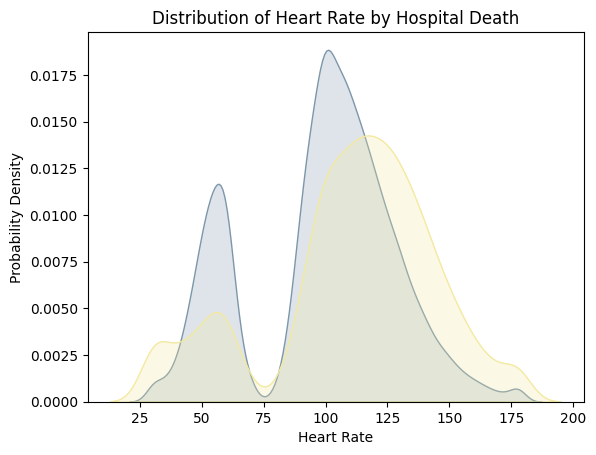

In [ ]:
sns.kdeplot(data=df[df['hospital_death'] == 0]['heart_rate_apache'], label='Survived', shade=True, color='#7C96AB')
sns.kdeplot(data=df[df['hospital_death'] == 1]['heart_rate_apache'], label='Not Survived', shade=True, color='#F3E99F')
plt.xlabel('Heart Rate')
plt.ylabel('Probability Density')
plt.title('Distribution of Heart Rate by Hospital Death')

# Feature Selection

*   Checking for correlation of features with respect to the label



In [ ]:
correlation = df.corr()['hospital_death']
correlation

age                              0.106603
bmi                             -0.030535
elective_surgery                -0.093574
ethnicity                        0.005274
gender                          -0.006811
height                          -0.019299
icu_admit_source                -0.022554
icu_stay_type                    0.016433
icu_type                         0.014979
pre_icu_los_days                 0.063316
weight                          -0.037775
apache_2_diagnosis              -0.089083
apache_3j_diagnosis             -0.089991
apache_post_operative           -0.083674
arf_apache                       0.027166
gcs_eyes_apache                 -0.255160
gcs_motor_apache                -0.276794
gcs_unable_apache                0.051369
gcs_verbal_apache               -0.236218
heart_rate_apache                0.107113
intubated_apache                 0.172231
map_apache                      -0.040217
resprate_apache                  0.085999
temp_apache                     -0

Removing features with less correlation with the label

In [ ]:
columns=['d1_temp_max','aids','d1_diasbp_noninvasive_max','ethnicity','d1_diasbp_max','d1_heartrate_min','gender','d1_spo2_max','diabetes_mellitus','d1_mbp_noninvasive_max','d1_mbp_max','height','icu_admit_source','d1_sysbp_noninvasive_max','d1_sysbp_max','bmi','h1_diasbp_max','h1_diasbp_noninvasive_max','weight','map_apache','h1_spo2_max','apache_2_bodysystem','h1_mbp_max','h1_mbp_noninvasive_max','h1_sysbp_noninvasive_max','h1_sysbp_max','apache_post_operative','apache_2_diagnosis','apache_3j_diagnosis','elective_surgery','icu_type','icu_stay_type','lymphoma','d1_potassium_min','d1_resprate_min','arf_apache','d1_glucose_min','leukemia','hepatic_failure','cirrhosis','immunosuppression','solid_tumor_with_metastasis','gcs_unable_apache','apache_3j_bodysystem','pre_icu_los_days','d1_glucose_max','h1_heartrate_min','resprate_apache','d1_resprate_max','h1_spo2_min','age','d1_potassium_max','heart_rate_apache','h1_resprate_min','h1_heartrate_max','h1_resprate_max','h1_diasbp_min','h1_diasbp_noninvasive_min','h1_mbp_min','h1_mbp_noninvasive_min','h1_sysbp_min','h1_sysbp_noninvasive_min']
for i in columns:
  df.drop(i,axis=1,inplace=True)

Best features for model building selected

In [ ]:
df2=pd.DataFrame(df.corr()['hospital_death'])
df2.sort_values(by='hospital_death',ascending=True)

,hospital_death
gcs_motor_apache,-0.276794
gcs_eyes_apache,-0.255160
gcs_verbal_apache,-0.236218
d1_sysbp_min,-0.209780
d1_spo2_min,-0.209462
d1_sysbp_noninvasive_min,-0.208513
d1_temp_min,-0.203179
d1_mbp_min,-0.194916
d1_mbp_noninvasive_min,-0.193877
d1_diasbp_min,-0.179225


<Axes: >

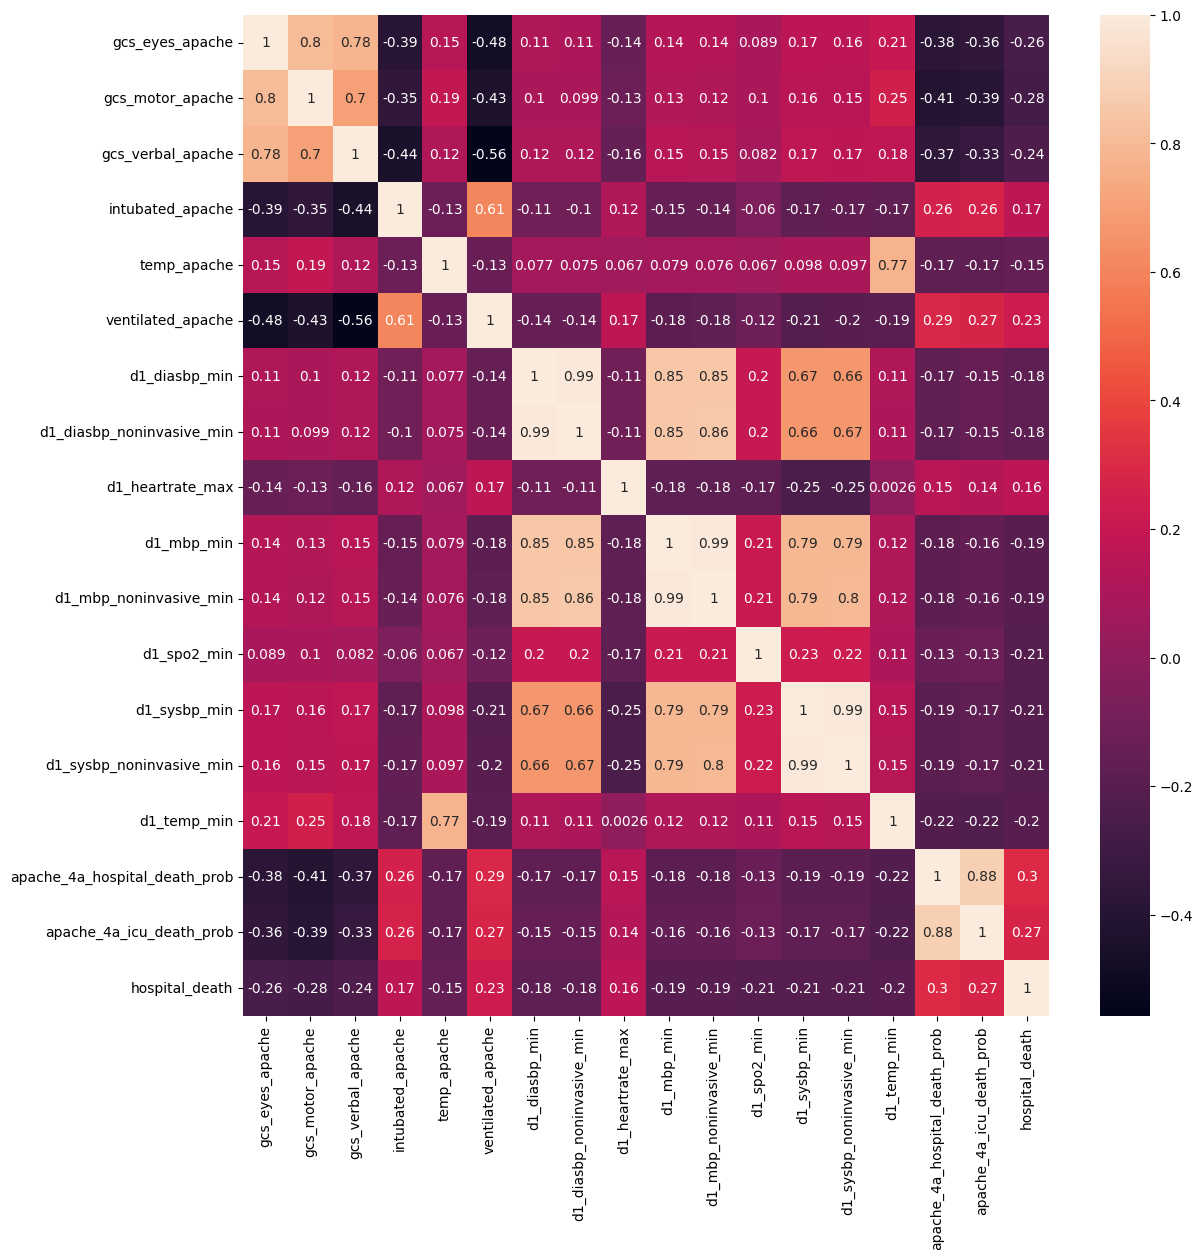

In [ ]:
plt.figure(figsize=(13,13))
sns.heatmap(df.corr(),annot=True)

In [ ]:
df['gcs_eyes_apache'].value_counts()

gcs_eyes_apache
4.000000    62995
3.000000    13863
1.000000     8274
2.000000     4680
3.465049     1901
Name: count, dtype: int64

In [ ]:
temp=df['temp_apache'].value_counts()

Text(0.5, 1.0, 'Distribution of Temp (apache)')

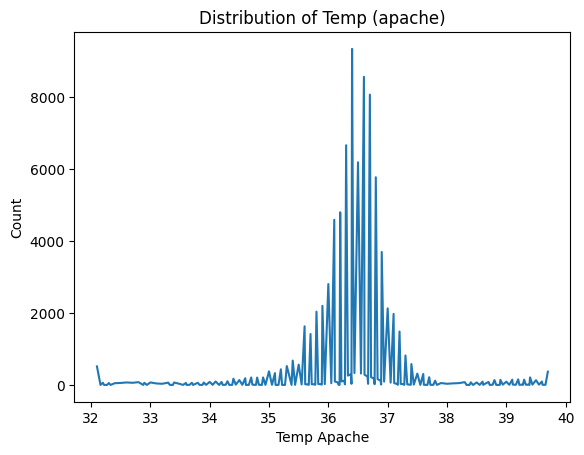

In [ ]:
sns.lineplot(x=temp.index, y=temp.values)
plt.xlabel("Temp Apache")
plt.ylabel("Count")
plt.title("Distribution of Temp (apache)")

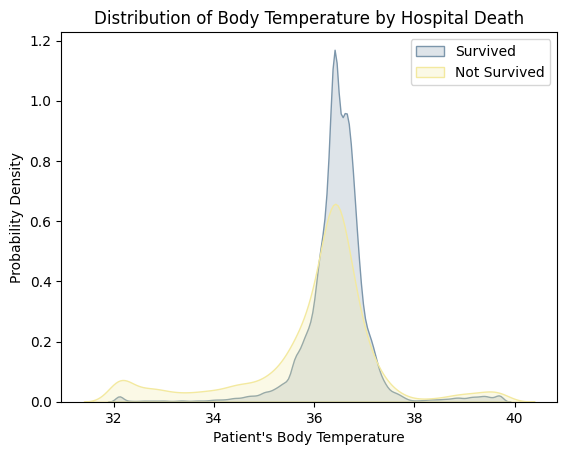

In [ ]:
sns.kdeplot(data=df[df['hospital_death'] == 0]['temp_apache'], label='Survived', shade=True, color='#7C96AB')
sns.kdeplot(data=df[df['hospital_death'] == 1]['temp_apache'], label='Not Survived', shade=True, color='#F3E99F')
plt.xlabel('Patient\'s Body Temperature')
plt.ylabel('Probability Density')
plt.title('Distribution of Body Temperature by Hospital Death')
plt.legend()
plt.show()

<Axes: xlabel='hospital_death', ylabel='count'>

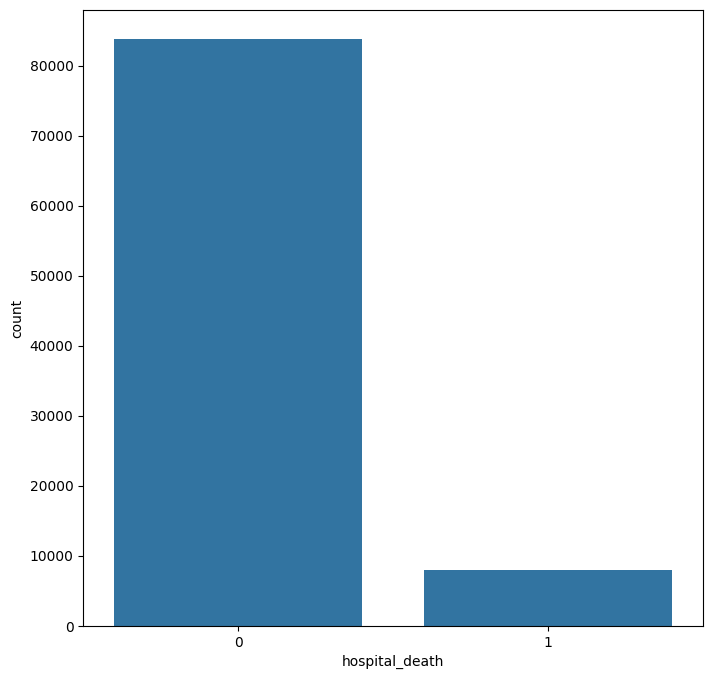

In [ ]:
plt.figure(figsize=(8,8))
sns.countplot(x='hospital_death',data=df)

Checking for outliers rom the selected features

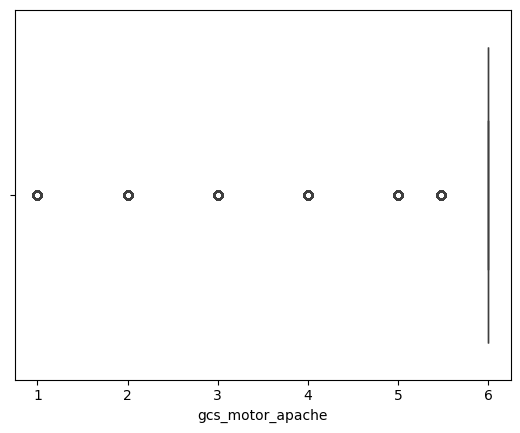

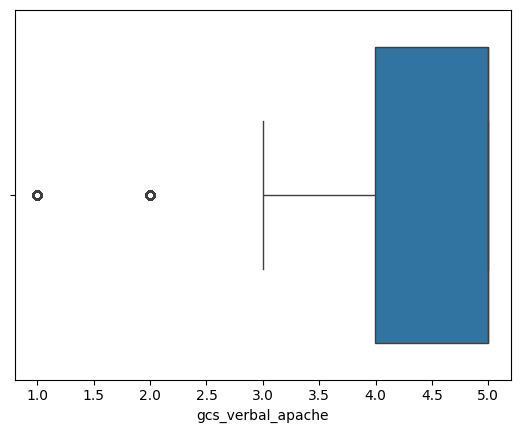

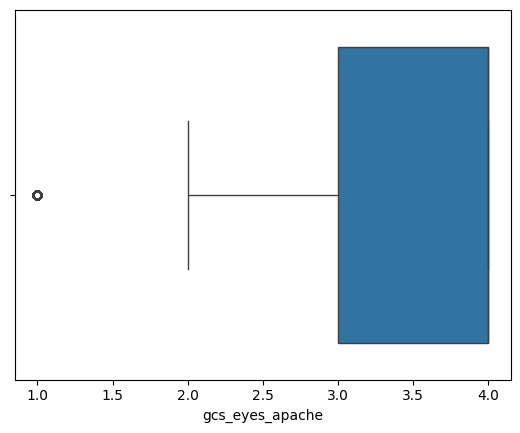

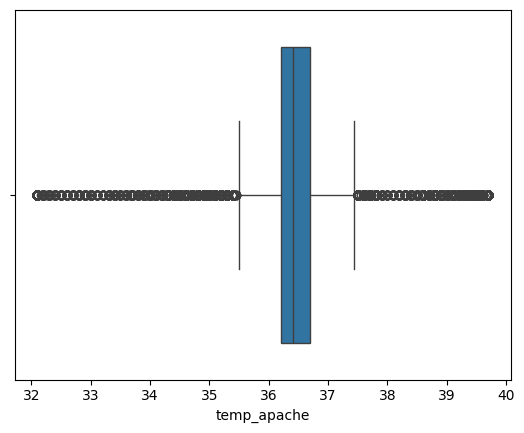

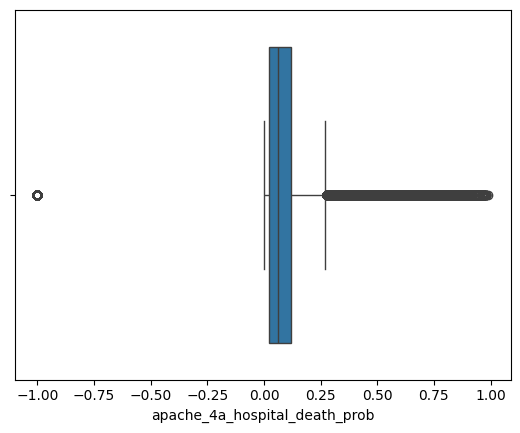

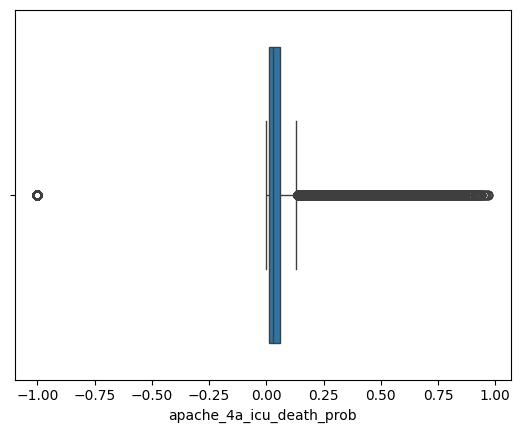

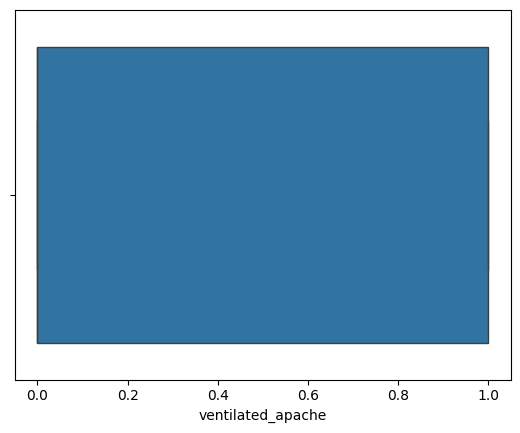

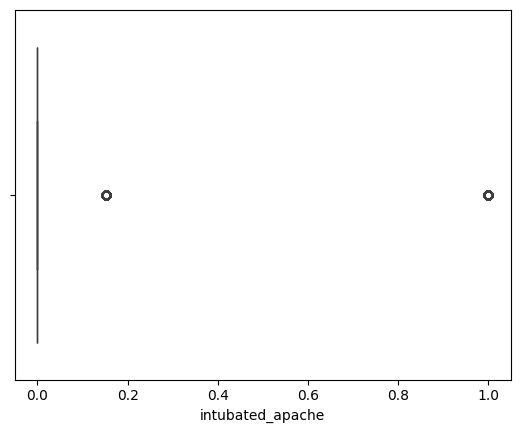

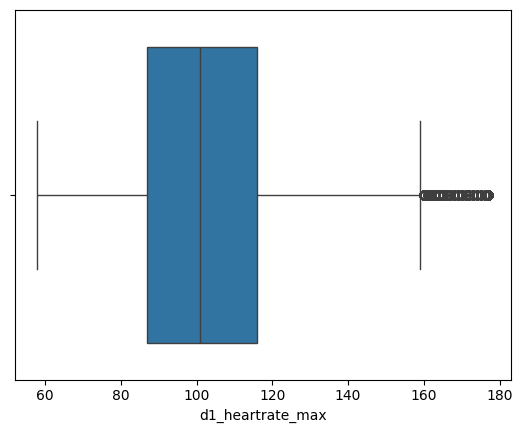

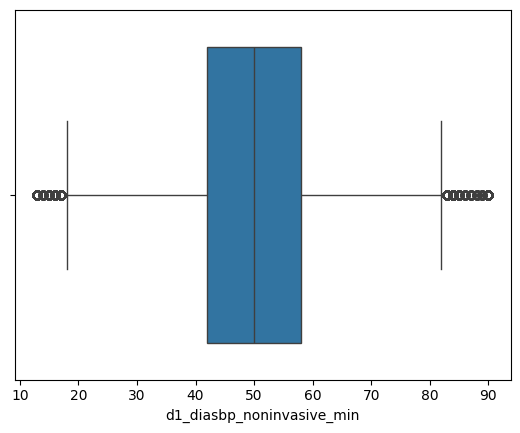

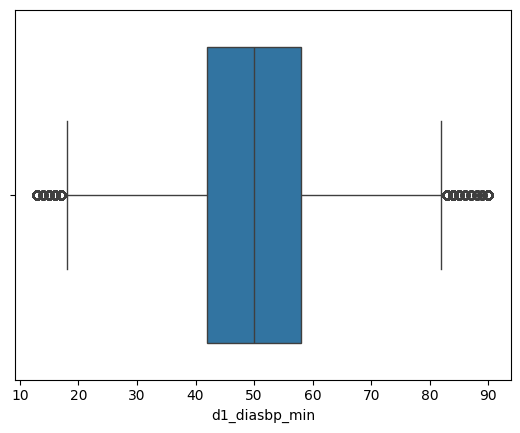

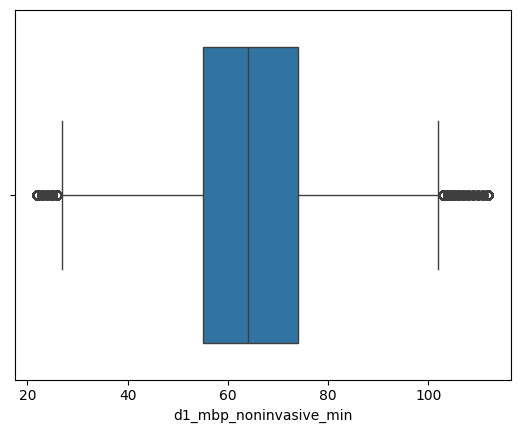

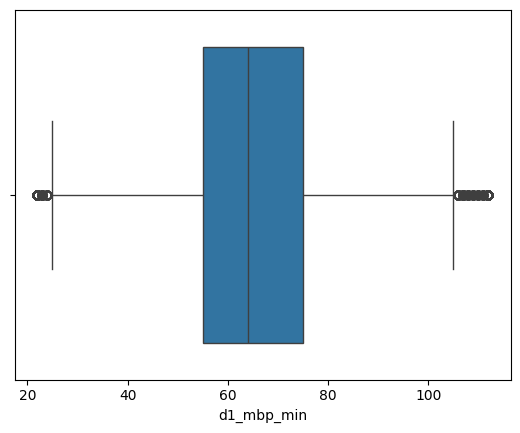

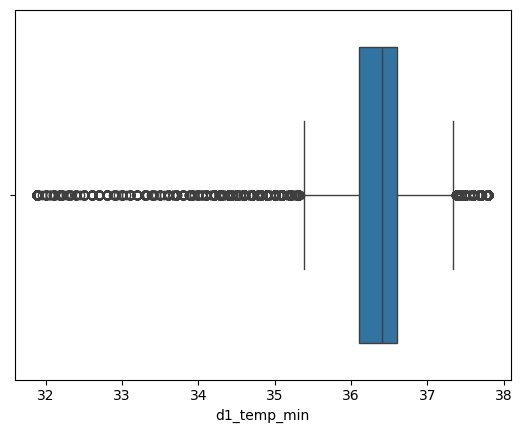

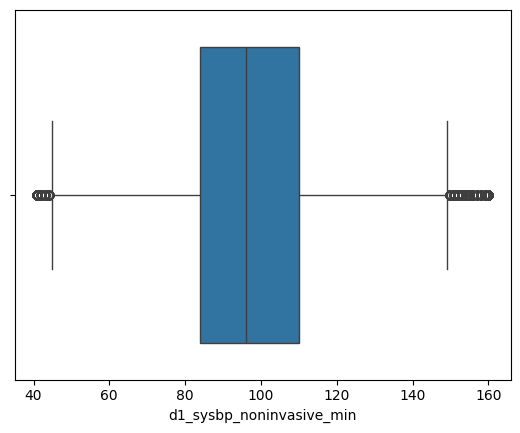

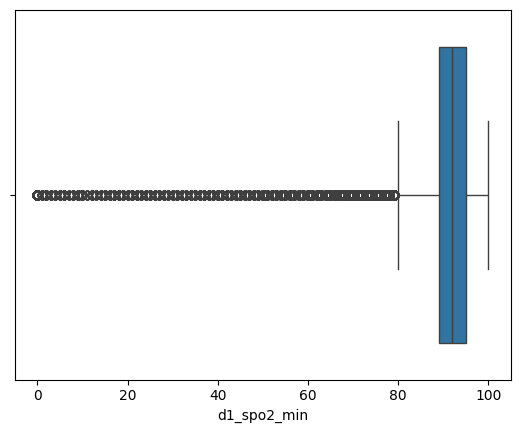

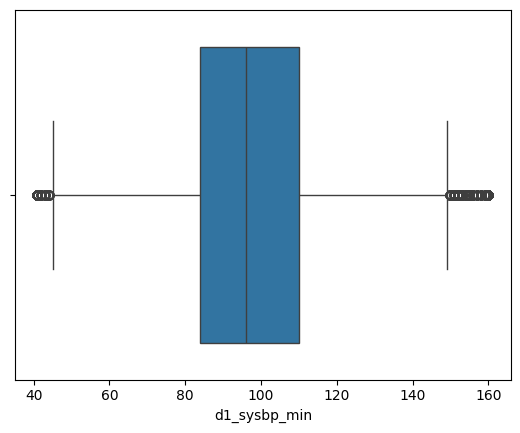

In [ ]:
outliers=['gcs_motor_apache','gcs_verbal_apache','gcs_eyes_apache','temp_apache','apache_4a_hospital_death_prob','apache_4a_icu_death_prob','ventilated_apache','intubated_apache','d1_heartrate_max','d1_diasbp_noninvasive_min','d1_diasbp_min','d1_mbp_noninvasive_min','d1_mbp_min','d1_temp_min','d1_sysbp_noninvasive_min','d1_spo2_min','d1_sysbp_min']
for i in outliers:
  sns.boxplot(x=df[i])
  plt.show()

In [ ]:
out=['gcs_motor_apache','gcs_verbal_apache','gcs_eyes_apache','temp_apache','apache_4a_hospital_death_prob','apache_4a_icu_death_prob','intubated_apache','d1_heartrate_max','d1_diasbp_noninvasive_min','d1_diasbp_min','d1_mbp_noninvasive_min','d1_mbp_min','d1_temp_min','d1_sysbp_noninvasive_min','d1_spo2_min','d1_sysbp_min']
for i in out:
  z=np.abs(stats.zscore(df[i]))
  threshold = 2
  outliers_ = df[z > threshold]
  df.drop(outliers_.index,inplace=True)

In [ ]:
df.shape

(43063, 18)

# Model Building

Implementing the features and label to Model

In [ ]:
X=df.iloc[:,:-1]

In [ ]:
y=df.iloc[:,-1]

Scaling the values using MinMaxScaler

In [ ]:
scaler=MinMaxScaler()
X_scaled=scaler.fit_transform(X)
X_scaled

array([[0.        , 1.        , 1.        , ..., 0.6954191 , 0.        ,
        0.        ],
       [1.        , 1.        , 1.        , ..., 0.63450292, 0.11904762,
        0.11764706],
       [1.        , 1.        , 1.        , ..., 0.63450292, 0.26190476,
        0.35294118],
       ...,
       [1.        , 1.        , 1.        , ..., 0.51267057, 0.02380952,
        0.        ],
       [1.        , 1.        , 1.        , ..., 0.63450292, 0.02380952,
        0.        ],
       [1.        , 0.66666667, 0.66666667, ..., 0.45175439, 0.16666667,
        0.11764706]])

Training the data

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.25,random_state=18)

Creating objects of models

In [ ]:
knn=KNeighborsClassifier(n_neighbors=5)
svc=SVC()
gnb=GaussianNB()
dt=DecisionTreeClassifier(criterion='gini')
rf=RandomForestClassifier(random_state=1)
ada=AdaBoostClassifier(random_state=1)
gb=GradientBoostingClassifier(random_state=1)
xgb=XGBClassifier(random_state=1)

Performance of each models after training and predicting the data

KNeighborsClassifier()
              precision    recall  f1-score   support

           0       0.97      1.00      0.98     10420
           1       0.14      0.01      0.01       346

    accuracy                           0.97     10766
   macro avg       0.56      0.50      0.50     10766
weighted avg       0.94      0.97      0.95     10766

SVC()
              precision    recall  f1-score   support

           0       0.97      1.00      0.98     10420
           1       0.00      0.00      0.00       346

    accuracy                           0.97     10766
   macro avg       0.48      0.50      0.49     10766
weighted avg       0.94      0.97      0.95     10766

GaussianNB()
              precision    recall  f1-score   support

           0       0.98      0.91      0.94     10420
           1       0.12      0.37      0.18       346

    accuracy                           0.89     10766
   macro avg       0.55      0.64      0.56     10766
weighted avg       0.95      0.8

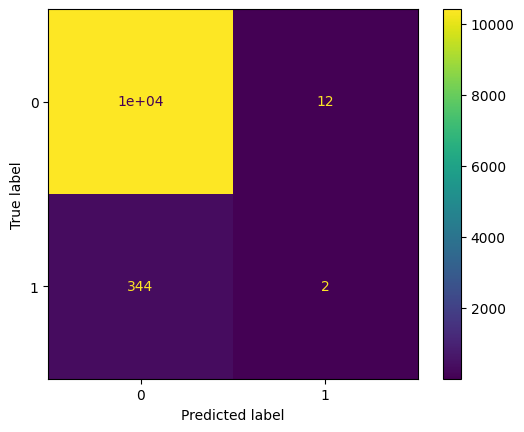

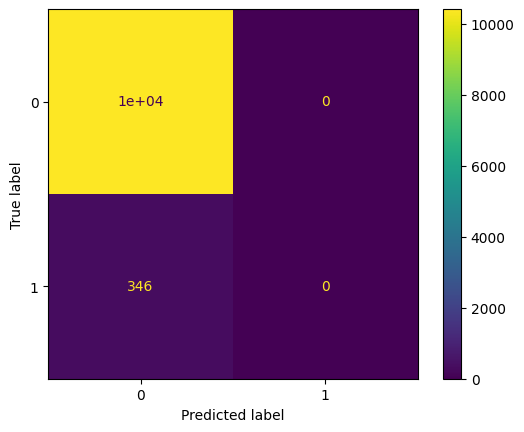

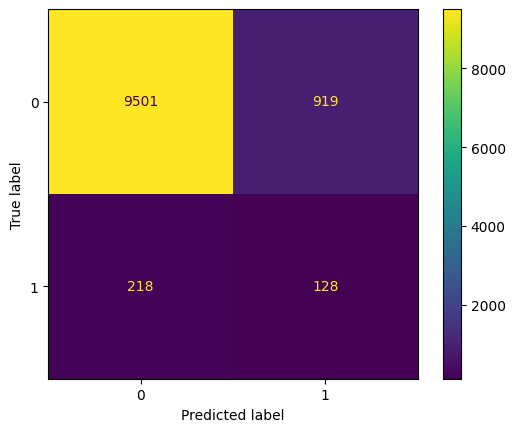

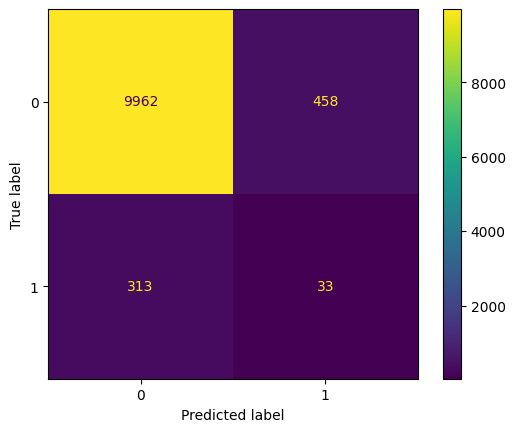

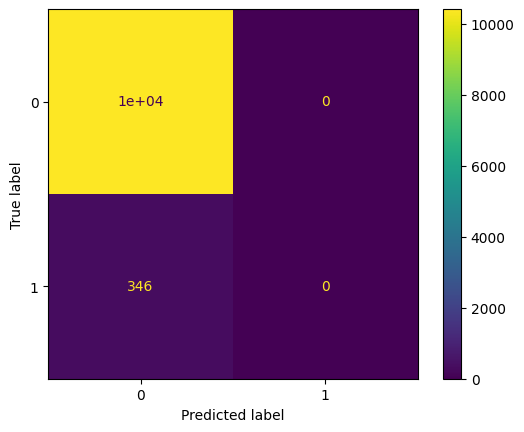

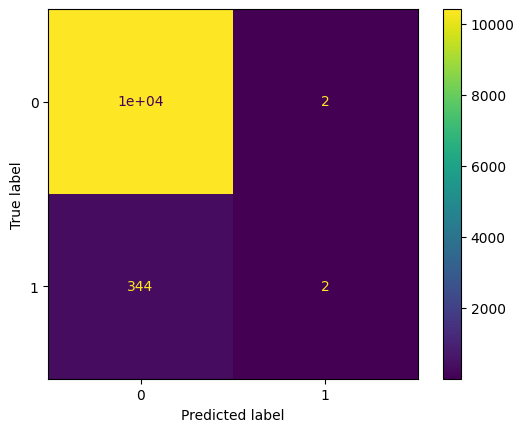

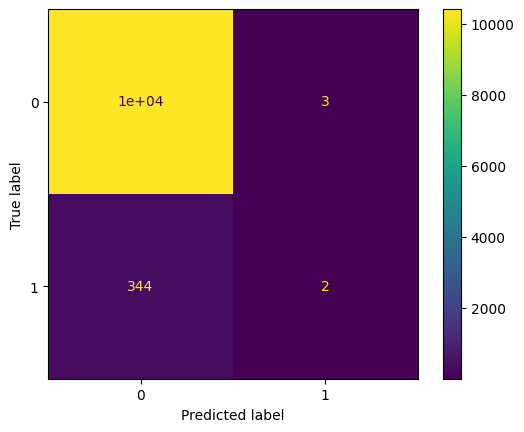

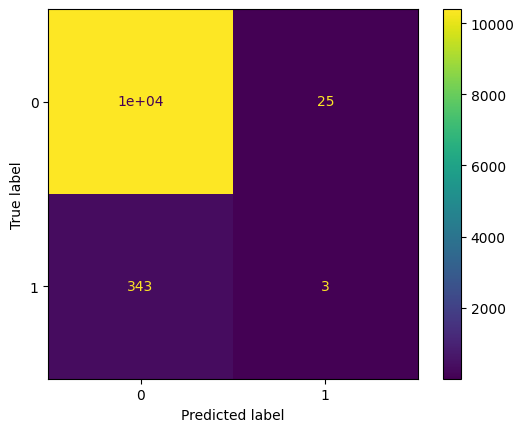

In [ ]:
models=[knn,svc,gnb,dt,rf,ada,gb,xgb]
r=[]
for model in models:
  print(model)
  model.fit(X_train,y_train)
  y_pred=model.predict(X_test)
  r.append({"Model": model.__class__.__name__, "Accuracy":accuracy_score(y_test,y_pred)})
  print(classification_report(y_test,y_pred))
  print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred))

In [ ]:
acc=pd.DataFrame(r)
print(acc)

                        Model  Accuracy
0        KNeighborsClassifier  0.966933
1                         SVC  0.967862
2                  GaussianNB  0.894390
3      DecisionTreeClassifier  0.928386
4      RandomForestClassifier  0.967862
5          AdaBoostClassifier  0.967862
6  GradientBoostingClassifier  0.967769
7               XGBClassifier  0.965818


This is an imbalanced dataset,so using overampling method for converting to a balanced dataset

In [ ]:
df.value_counts('hospital_death')

hospital_death
0    41707
1     1356
Name: count, dtype: int64

Oversampling using Smote

In [ ]:
smote=SMOTE(random_state=1)
X_os,y_os=smote.fit_resample(X,y)

In [ ]:
y_os.value_counts()

hospital_death
0    41707
1    41707
Name: count, dtype: int64

In [ ]:
X_os_sc=scaler.fit_transform(X_os)
X_os_sc

array([[0.        , 1.        , 1.        , ..., 0.6954191 , 0.        ,
        0.        ],
       [1.        , 1.        , 1.        , ..., 0.63450292, 0.11904762,
        0.11764706],
       [1.        , 1.        , 1.        , ..., 0.63450292, 0.26190476,
        0.35294118],
       ...,
       [1.        , 1.        , 0.95931936, ..., 0.62851016, 0.15738594,
        0.13200493],
       [1.        , 1.        , 1.        , ..., 0.39236111, 0.35612136,
        0.50729865],
       [1.        , 0.93753249, 1.        , ..., 0.76017223, 0.1725912 ,
        0.1249656 ]])

In [ ]:
X_os_train,X_os_test,y_os_train,y_os_test=train_test_split(X_os_sc,y_os,test_size=0.25,random_state=18)

KNeighborsClassifier()
              precision    recall  f1-score   support

           0       1.00      0.86      0.92     10376
           1       0.88      1.00      0.93     10478

    accuracy                           0.93     20854
   macro avg       0.94      0.93      0.93     20854
weighted avg       0.94      0.93      0.93     20854

SVC()
              precision    recall  f1-score   support

           0       0.81      0.88      0.84     10376
           1       0.87      0.79      0.83     10478

    accuracy                           0.84     20854
   macro avg       0.84      0.84      0.84     20854
weighted avg       0.84      0.84      0.84     20854

GaussianNB()
              precision    recall  f1-score   support

           0       0.69      0.75      0.72     10376
           1       0.73      0.66      0.69     10478

    accuracy                           0.71     20854
   macro avg       0.71      0.71      0.71     20854
weighted avg       0.71      0.7

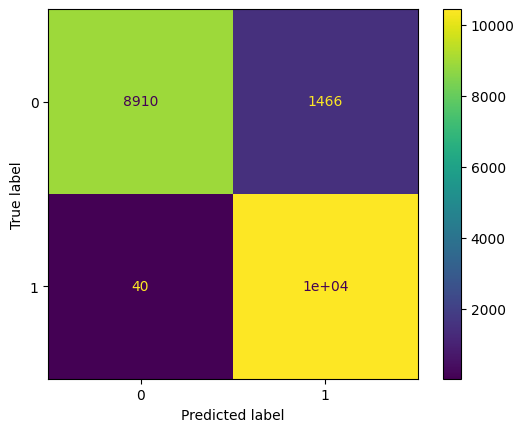

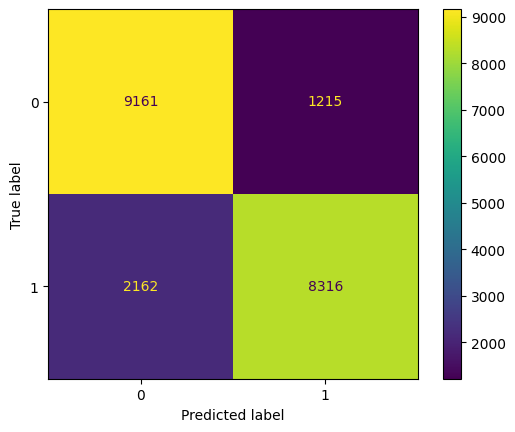

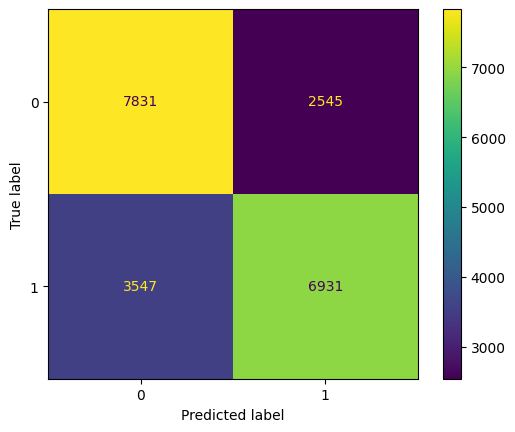

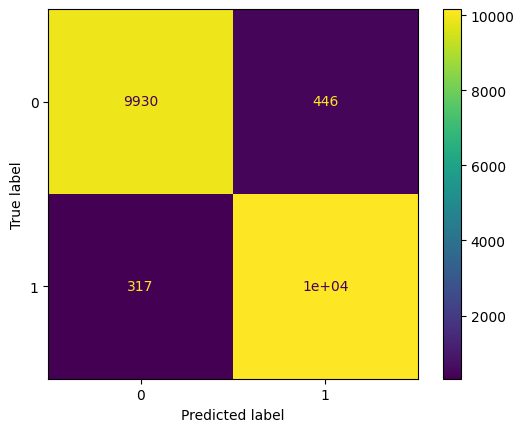

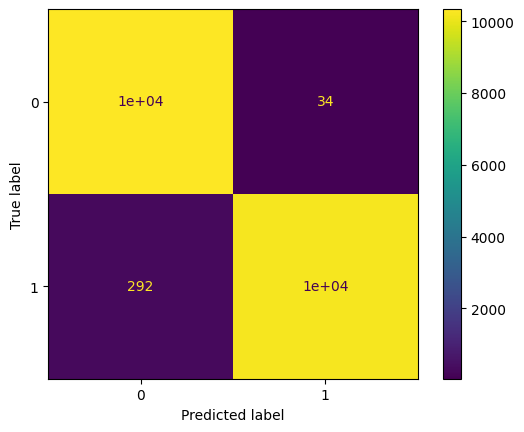

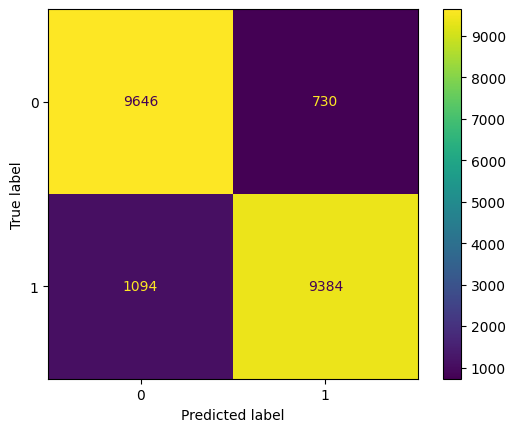

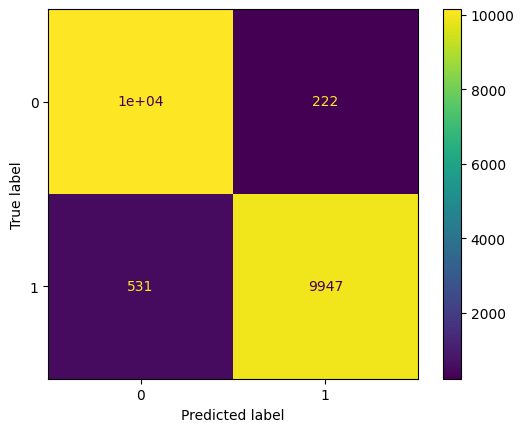

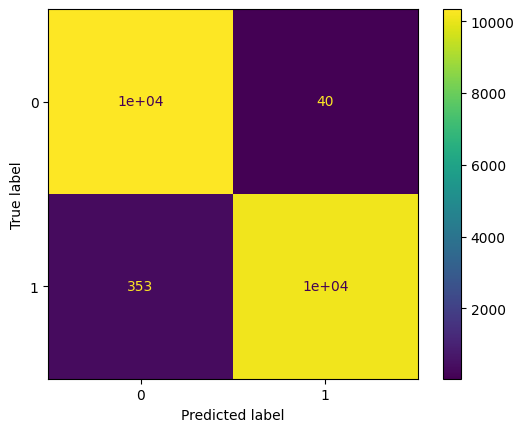

In [ ]:
l=[]
models=[knn,svc,gnb,dt,rf,ada,gb,xgb]
for model in models:
  print(model)
  model.fit(X_os_train,y_os_train)
  y_pred_os=model.predict(X_os_test)
  l.append({"Model": model.__class__.__name__, "Accuracy":accuracy_score(y_os_test,y_pred_os)})
  print(classification_report(y_os_test,y_pred_os))
  print(ConfusionMatrixDisplay.from_predictions(y_os_test,y_pred_os))

In [ ]:
accos=pd.DataFrame(l)
print(accos['Accuracy'])

[0.92778364 0.83806464 0.70787379 0.9634123  0.98436751 0.91253477
 0.96389182 0.98115469]


Hypertuning RandomForestClassifier

In [ ]:
params={'n_estimators': [25, 50],
    'max_features': ['sqrt', 'log2', None],
    'max_depth': [3, 6, 9]}
grid_search=GridSearchCV(rf,params,scoring='accuracy')
grid_search.fit(X_os_train,y_os_train)
print(grid_search.best_estimator_)

RandomForestClassifier(max_depth=9, max_features=None, n_estimators=50,
                       random_state=1)


In [ ]:
rftuned=RandomForestClassifier(n_estimators=50,max_features=None,max_depth=9)
rftuned.fit(X_os_train,y_os_train)
y_pred_rftuned=rftuned.predict(X_os_test)
print(classification_report(y_os_test,y_pred_rftuned))

              precision    recall  f1-score   support

           0       0.95      0.94      0.94     10376
           1       0.94      0.95      0.95     10478

    accuracy                           0.95     20854
   macro avg       0.95      0.95      0.95     20854
weighted avg       0.95      0.95      0.95     20854



Model Accuracy Comparison

In [ ]:
accuracy = pd.DataFrame({'Model': ['KNeighborsClassifier', 'SVC', 'Naive Bayes', 'Decision Tree', 'Random Forest', 'AdaBoost', 'Gradient Boost', 'XGBoost'], 'Accuracy': acc['Accuracy'].values,'Accuracy_os':accos['Accuracy'].values})
print(accuracy)

                  Model  Accuracy  Accuracy_os
0  KNeighborsClassifier  0.966933     0.927784
1                   SVC  0.967862     0.838065
2           Naive Bayes  0.894390     0.707874
3         Decision Tree  0.928386     0.963412
4         Random Forest  0.967862     0.984368
5              AdaBoost  0.967862     0.912535
6        Gradient Boost  0.967769     0.963892
7               XGBoost  0.965818     0.981155


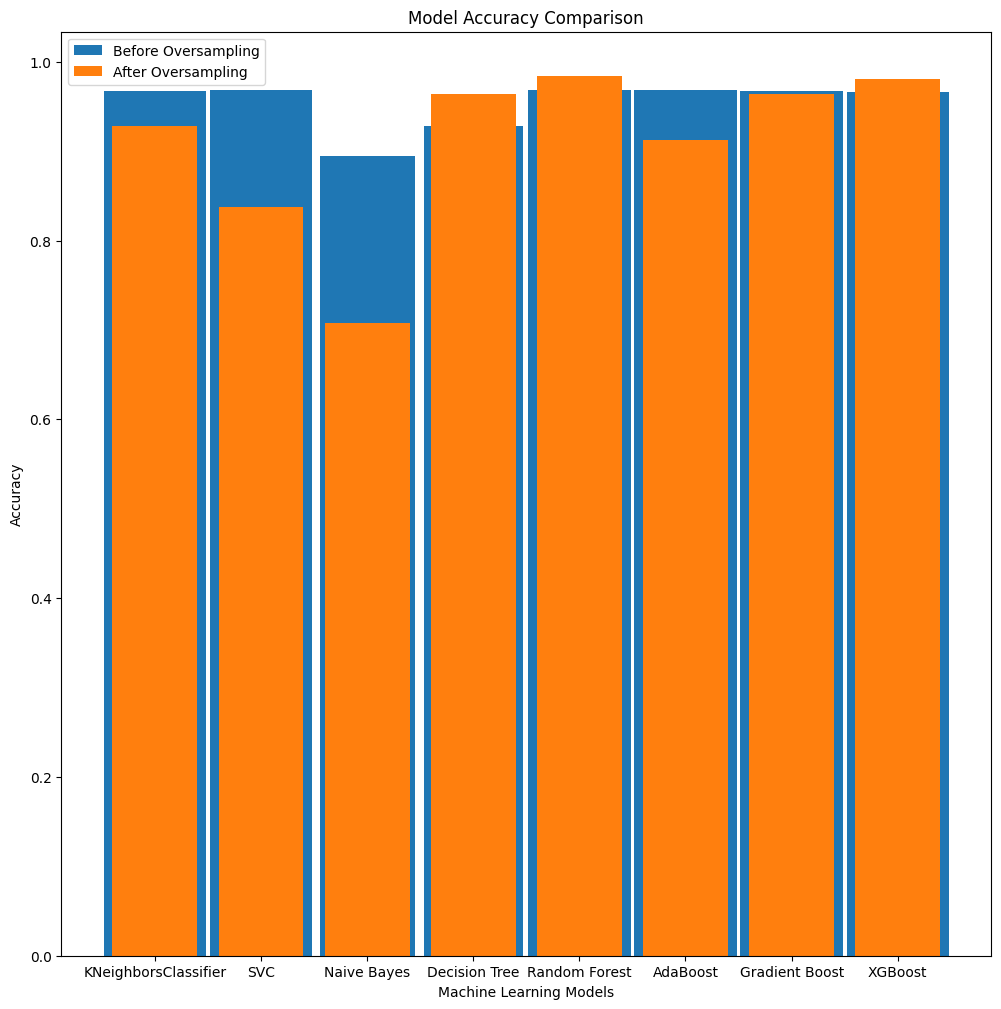

In [ ]:
mo = ['KNeighborsClassifier','SVC','Naive Bayes','Decision Tree', 'Random Forest','AdaBoost','Gradient Boost','XGBoost']
accuracyos=accos['Accuracy']
accuracy=acc['Accuracy']
plt.figure(figsize=(12,12))
plt.bar(mo,accuracy,accuracy,label='Before Oversampling')
plt.bar(mo,accuracyos,label='After Oversampling')
plt.legend()
plt.title('Model Accuracy Comparison')
plt.xlabel('Machine Learning Models')
plt.ylabel('Accuracy')
plt.show()

Finding out and ROC and AUC score

In [ ]:
y_predrf=rf.predict(X_os_test)
fpr,tpr,thresholds = roc_curve(y_os_test,y_predrf)
random_probs= [0 for i in range(len(y_os_test))]
p_fpr,p_tpr,_= roc_curve(y_os_test,random_probs)
auc_score_rf=roc_auc_score(y_os_test,y_predrf)
print("AUC Score of RandomForestClassifier",auc_score_rf)

AUC Score of RandomForestClassifier 0.9844276468388515


Plotting ROC-AUC curve of RandomForestClassifier

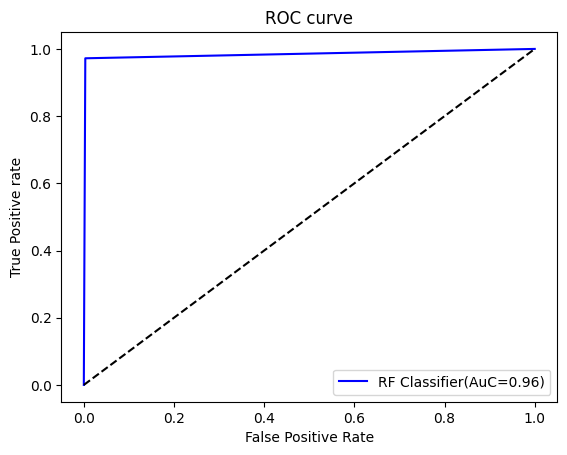

In [ ]:
plt.plot(fpr, tpr, linestyle='-',color='blue', label='RF Classifier(AuC=0.98)')
plt.plot(p_fpr, p_tpr, linestyle='--', color='black')
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.show()

Predicting custom values

In [ ]:
y_cust=rf.predict(scaler.transform([[3.000000,6.000000,4.000000,0.0,39.3,0.0,37.0,37.0,119.0,46.0,46.0,74.0,73.0,73.0,37.2,0.100000,0.050000]]))
result=y_cust.item()
if result==0:
  print("Patient will survive")
else:
  print("Patient will not survive")

Patient will survive


Importing model for streamlit


In [ ]:
pickle.dump(rf,open('project1.sav','wb'))

In [ ]:
pickle.dump(scaler,open('minmaxscaler1.sav','wb'))